In [22]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import glob
import errno
from scipy.stats import multivariate_normal

In [23]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

In [24]:
def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [42]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
#     """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
        self.log_likelihood = []
    
#     """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X.flatten())
#             print("r in prob ",r.shape)
#             print("r ",r)

#         """
#         Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
#         cluster c
#         """
        for i in range(len(r)):
        	# Write code here
#             print("before ",r[i])
            val = np.sum(self.pi)*np.sum(r,axis=1)[i]
            r[i] = r[i]/val
#             print("r axis 1 ",np.sum(r,axis=1))
#             print("sum pi ",np.sum(self.pi))
#             print("after ",r[i])
#             pass
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

#             """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

#             """
#             Probability for each datapo


#          x_i to belong to gaussian g 
#             """
            r = self.calculate_prob(r)
#             print("r = ",r)


#             """Plot the data"""
            self.plot(r)
            
#             """M-Step"""

#             """calculate m_c"""
            m_c = []
            # write code here
            for c in range(len(r[0])):
                label = r[:,c]
                m = np.sum(label)
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
            
            print(m_c)
#             """calculate pi_c"""
            # write code here
            for k in range(len(m_c)):
                length = np.sum(m_c)
                self.pi[k] = (m_c[k]/length) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
            
#             """calculate mu_c"""
            # write code here
            y = self.X.reshape(len(self.X),1)
            self.mu = np.sum(y*r,axis=0)/m_c
            print ("Updated mu= ",self.mu)


#             """calculate var_c"""
            var_c = []
            #write code here
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            
            log_likelihoods = []
            print ("Updated var= ", var_c)
#             plt.show()
            import matplotlib.pyplot as plt1
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i], self.var[j]).pdf(self.X) for k,i,j in zip(self.pi, range(len(self.mu)), range(len(self.var)))])))
            print("likelihoods ", log_likelihoods)
            
            plt.show()

['/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset2.pkl', '/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset1.pkl', '/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset3.pkl']
(180, 1)
[99.94836775692406, 67.10972394373059, 12.941908299345368]
Updated mu=  [-10.57714486  14.13038249   4.6187292 ]
Updated var=  [array([[79.81717667]]), array([[60.02730873]]), array([[2.39987419]])]
likelihoods  [1.3558370039507135]


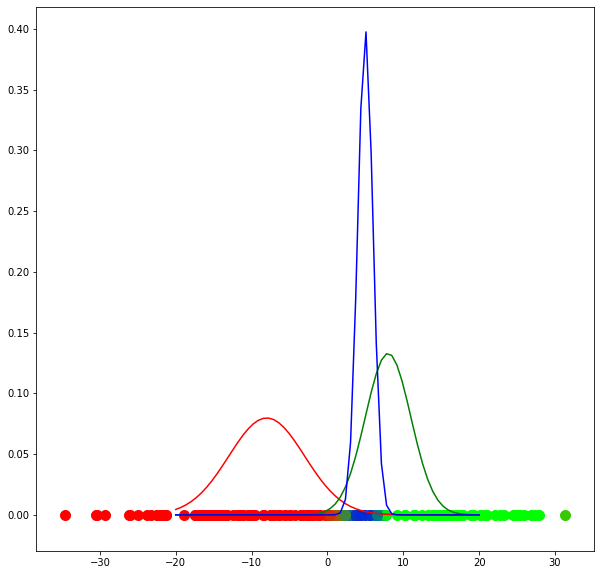

In [43]:
# To run the code - 
files = glob.glob('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset*.pkl')
print(files)
data1 = load('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset1.pkl')
data1 = np.vstack((data1,load('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset2.pkl')))
data1 = np.vstack((data1,load('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset3.pkl')))
# for i in range(1, 4):
#     if(i>1):
#         data= np.vstack((data,load('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset*.pkl'.format(str(i)))))
#     else:
#         data= load('/home/ubuntu/Desktop/sem2/smai/assignment2/Datasets/Question-2/dataset{}.pkl'.format(str(i)))
    
print (data1.shape)
g = GMM1D(data1,1,[-8,8,5],[1/3,1/3,1/3],[5,3,1])
g.run()